In [1]:
import numpy
import pandas
import seaborn

import joblib
import sklearn.cluster

import matplotlib.pyplot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Instructions

- Read **the train data** from the CSV file and properly set the index
- Note that the trained model will not be used in this investigation
- Define a `pandas.DataFrame` named `initial_cluster_centers` as follows
```
cluster	feature_1	feature_2
0           0.0         1.0
1           1.0         0.0
2           1.0         1.0
```
- Define a `pandas.DataFrame` named `model_cluster_centers` as follows
```
cluster	feature_1	feature_2
0       -4.862155    0.103531
1        1.756862    0.422756
2       -8.802458   -5.382182
```

In [2]:
data_train = pandas.read_csv('./data/features.train.csv').set_index('id')
data_train

,feature_1,feature_2
id,,
253,2.1592,0.0103
667,-5.1157,0.8180
85,1.8528,-0.0038
969,-6.3364,-1.9423
75,-5.8828,-2.6060
...,...,...
835,2.1841,0.0434
192,-8.5461,-8.3446
629,-7.6355,-6.3077


In [3]:
initial_cluster_centers = pandas.DataFrame(
    data = [
        [0,  1.],
        [1., 0.],
        [1., 1.],
    ],
    columns = ['feature_1', 'feature_2'],
)
initial_cluster_centers.index.name = 'cluster'
initial_cluster_centers

,feature_1,feature_2
cluster,,
0,0.0,1.0
1,1.0,0.0
2,1.0,1.0


In [4]:
model_cluster_centers = pandas.DataFrame(
    data = [
        [-4.86215514,  0.10353131],
        [ 1.7568625,   0.42275588],
        [-8.80245758, -5.38218182],
    ],
    columns = ['feature_1', 'feature_2'],
)
model_cluster_centers.index.name = 'cluster'
model_cluster_centers

,feature_1,feature_2
cluster,,
0,-4.862155,0.103531
1,1.756862,0.422756
2,-8.802458,-5.382182


# Instructions


- Type the equation of the K-mean loss function using Markdown language
- Write a function that takes a sample as input and returns the squared distance from the nearest center
- Evaluate the squared distance function at $[1., -0.5]$ with respect to `initial_cluster_centers`
- Discuss which cluster is producing the minimum squared distance
- Now, apply the squared distance function for the entire training data
  - With respect to `initial_cluster_centers`
  - With respect to `model_cluster_centers`
  - Properly put them in a `pandas.DataFrame`
- Explain how to calculate the loss from the dataframe
  - Also, evaluate and discuss the loss values


Finding the locations of cluster centers that minimize the following loss function

\begin{equation}\mathrm{loss_{data}(cluster\_centers)} = \sum_{i}  
   \Big\{ 
      \| \mathbf{x}_i - \mathrm{nearest\,\,cluster\,center} \|^2
   \Big \} 
\end{equation}

\begin{equation}\mathrm{loss_{data}(cluster\_centers)} = \sum_{i} \min 
   \Big\{ 
      \| \mathbf{x}_i - \mathrm{1^{th}\,center} \|^2,
      ...,
      \| \mathbf{x}_i - \mathrm{n^{th}\,center} \|^2
   \Big \} 
\end{equation}

In [5]:
def calculate_squared_distance_from_nearest_center(sample, cluster_centers_):
    return (
        (sample - cluster_centers_)
        .apply(numpy.square)
        .sum(axis='columns')
        .min()
    )


In [6]:
calculate_squared_distance_from_nearest_center(
    sample = [1., -0.5],
    cluster_centers_ = initial_cluster_centers
)

0.25

Note that the data point [1., -0.5] belongs to the cluster whose center is [1., 0.]

In [7]:
squared_distances_from_nearest_centers = pandas.DataFrame({
    
    'initial_cluster_centers': data_train[['feature_1', 'feature_2']].apply(
        func = calculate_squared_distance_from_nearest_center,
        axis = 'columns',
        cluster_centers_ = initial_cluster_centers,
    ),
    
    'model_cluster_centers': data_train[['feature_1', 'feature_2']].apply(
        func = calculate_squared_distance_from_nearest_center,
        axis = 'columns',
        cluster_centers_ = model_cluster_centers,
    ),
})

squared_distances_from_nearest_centers

,initial_cluster_centers,model_cluster_centers
id,,
253,1.343851,0.331995
667,26.203510,0.574751
85,0.727282,0.191154
969,48.807094,6.358824
75,47.610572,8.383276
...,...,...
835,1.403976,0.326443
192,160.357374,8.841641
629,111.703340,2.218374


In [8]:
squared_distances_from_nearest_centers.sum(axis='index')

initial_cluster_centers    39249.038445
model_cluster_centers       2775.575448
dtype: float64

# Instructions

- This part investigates what happens during model training
- Partially trained models are obtained by limiting the number of training iterations
- Extend the following code base to append various metrics from partially trained models to `training_results`
- Plot the `loss` against the iteration number

```
training_results = []

for i in range(1, 11):
    model = sklearn.cluster.KMeans(
        n_clusters    = 3,
        init          = initial_cluster_centers,
        max_iter      = i,
    )
    model.fit(data_train[['feature_1', 'feature_2']],)

    model_file = f'./model/model.iter{i:02d}.joblib'
    joblib.dump(model, model_file)
    
    # insert code here
    # loss = ...
    
    training_results.append({
        'iter' : i,
        'loss' : loss,
        'model_file': model_file,
    })
    
training_results = pandas.DataFrame(training_results).set_index('iter')
    
    

```

In [9]:
training_results = []

for i in range(1, 11):
    model = sklearn.cluster.KMeans(
        n_clusters    = 3,
        init          = initial_cluster_centers,
        max_iter      = i,
    )
    model.fit(data_train[['feature_1', 'feature_2']],)

    model_file = f'./model/model.iter{i:02d}.joblib'
    joblib.dump(model, model_file)
    
    loss = model.inertia_
    training_results.append({
        'iter' : i,
        'loss' : loss,
        'model_file': model_file,
    })
    
training_results = pandas.DataFrame(training_results).set_index('iter')
    

In [10]:
training_results

,loss,model_file
iter,,
1,7364.671289,./model/model.iter01.joblib
2,5976.040094,./model/model.iter02.joblib
3,3770.377759,./model/model.iter03.joblib
4,3004.642446,./model/model.iter04.joblib
5,2811.777785,./model/model.iter05.joblib
6,2784.268901,./model/model.iter06.joblib
7,2778.625416,./model/model.iter07.joblib
8,2775.909417,./model/model.iter08.joblib
9,2775.611178,./model/model.iter09.joblib


<Axes: xlabel='iter'>

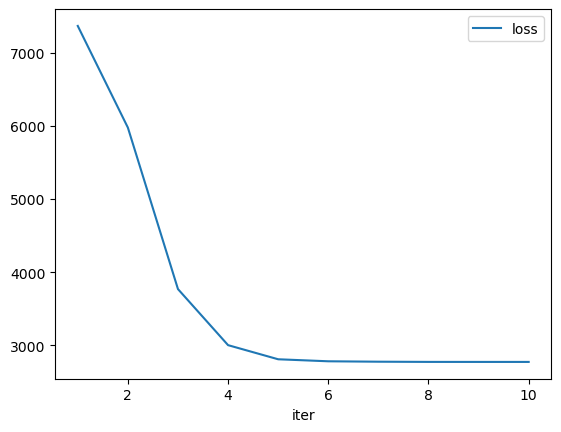

In [11]:
training_results[['loss']].plot()

# Instructions

- Write a function that takes a model and training samples as input and plot the cluster boundary with overlaying training samples
  - Hint: reuse/refactor code from the previous step
 
- Load the model files and use the function to visualize the evolution of cluster boundaries


In [12]:
def plot_cluster_boundary_with_training_data(model, data_train):
    range_feature_1 = numpy.linspace(data_train['feature_1'].min(), data_train['feature_1'].max(), 50)
    range_feature_2 = numpy.linspace(data_train['feature_2'].min(), data_train['feature_2'].max(), 50)

    features = numpy.meshgrid(range_feature_1, range_feature_2)

    data_meshgrid = pandas.DataFrame({
        'feature_1': features[0].reshape(-1), 
        'feature_2': features[1].reshape(-1),
    })
    
    data_meshgrid['prediction']  = model.predict(data_meshgrid[['feature_1', 'feature_2']])
    
    matplotlib.pyplot.figure()
    seaborn.scatterplot(
        data_meshgrid,
        x   = 'feature_1',
        y   = 'feature_2',
        hue = 'prediction',
    )

    seaborn.scatterplot(
        data_train,
        x   = 'feature_1',
        y   = 'feature_2',
    )
    


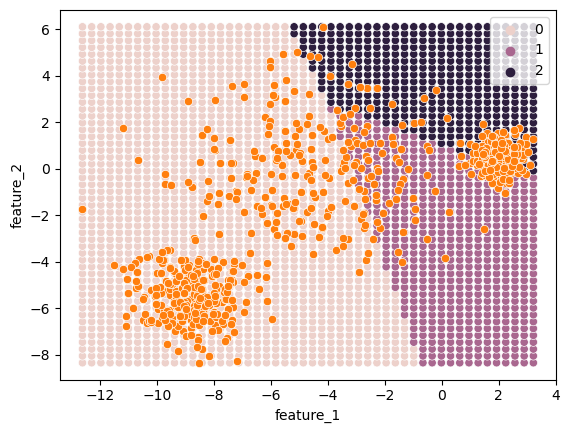

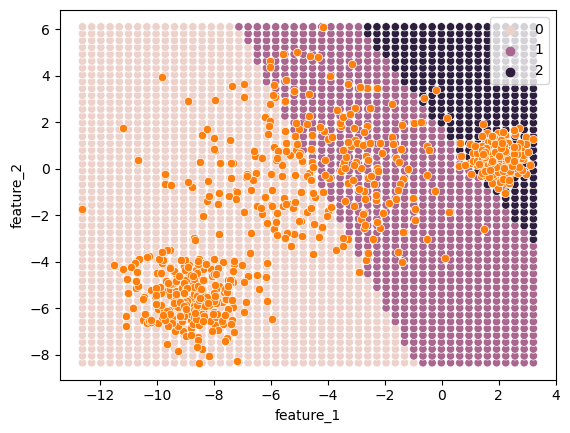

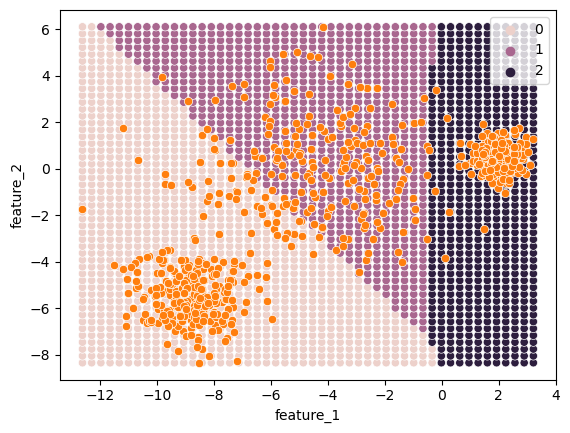

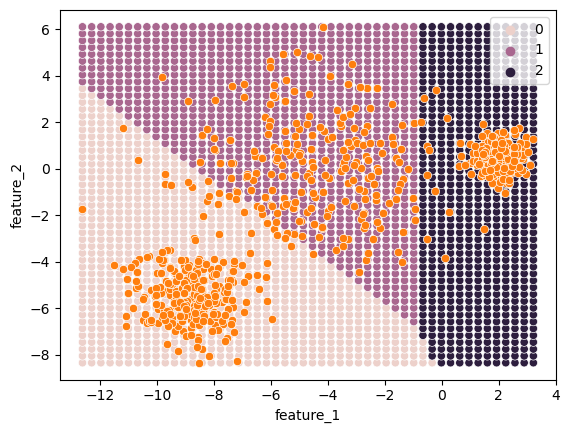

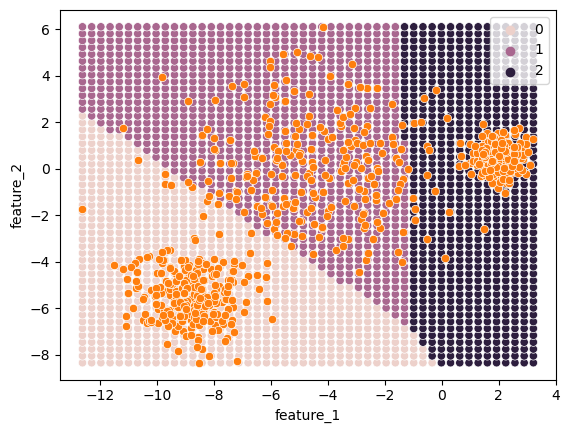

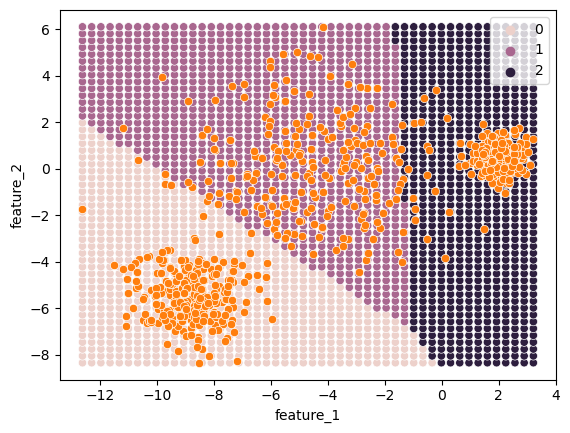

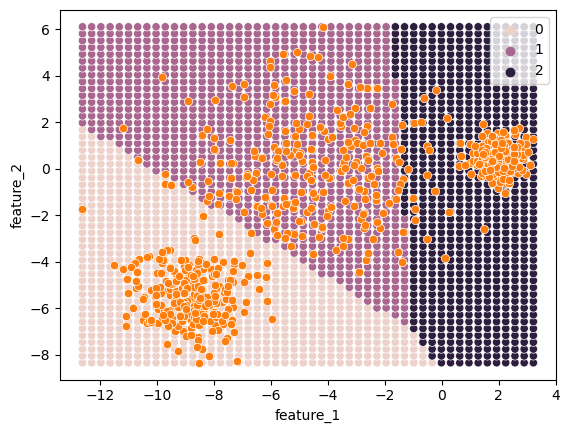

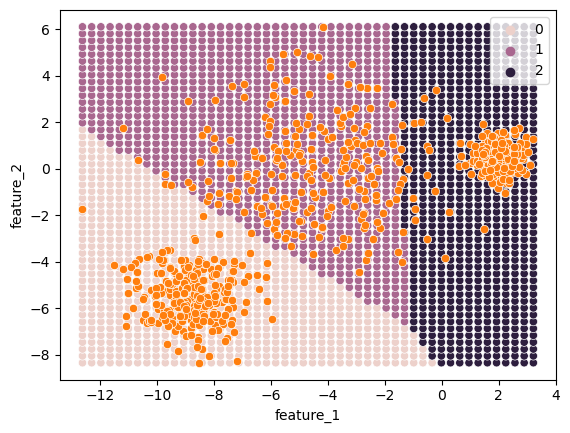

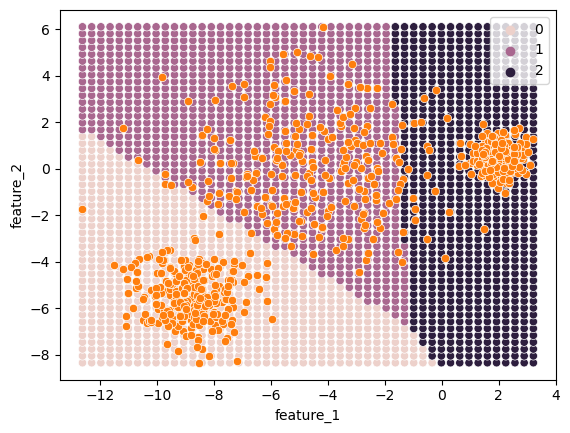

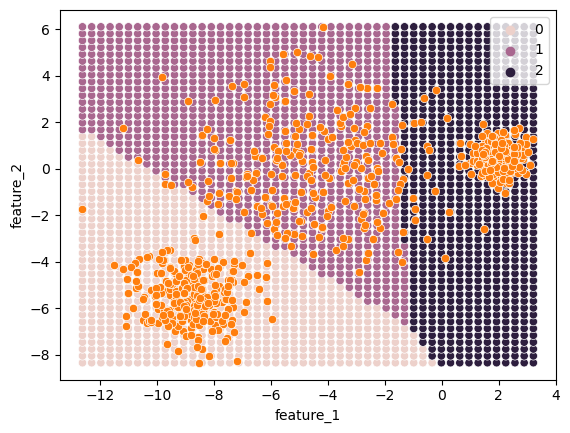

In [13]:
for model_file in training_results['model_file']:
    model = joblib.load(model_file)
    plot_cluster_boundary_with_training_data(model, data_train)